In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from collections import defaultdict, Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from numpy import log1p, sqrt
from matplotlib.colors import Normalize
from wordcloud import WordCloud
import re
import pandas as pd
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import matplotlib.colors as mcolors
# Set global font family to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

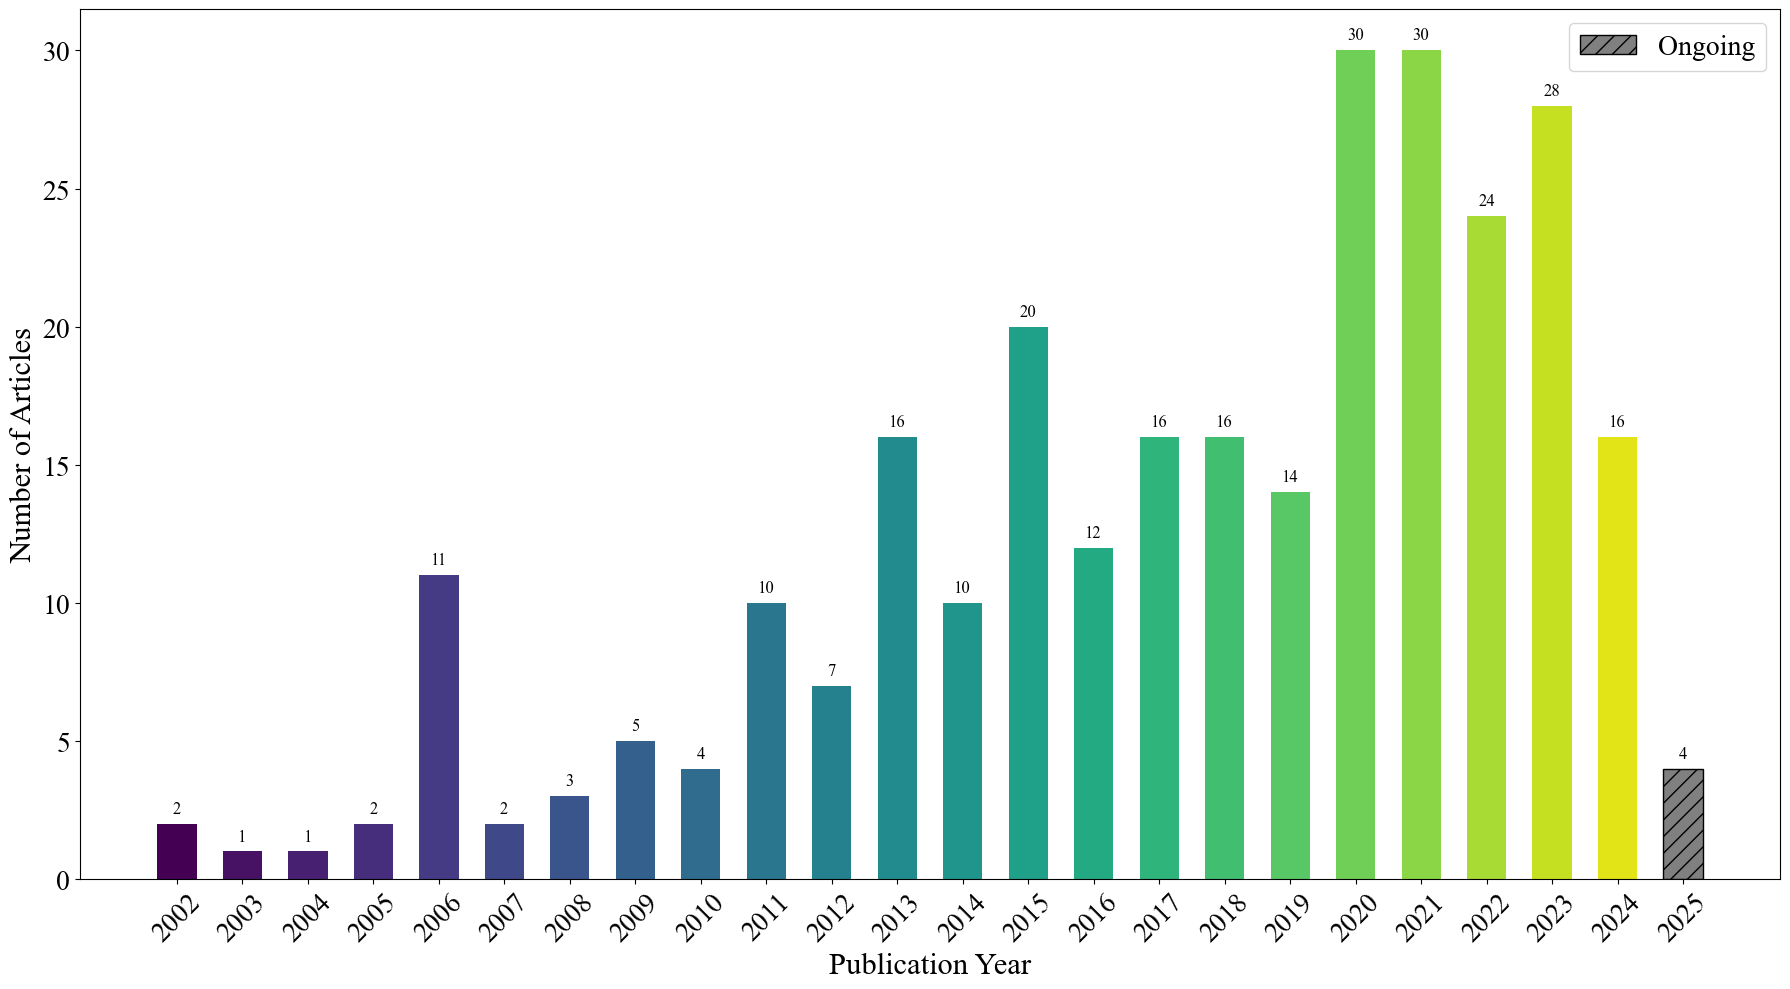

In [2]:
#Publication trend from the year 2000 to present

# === File Paths ===
file_path = "C:/Users/mouly/Dropbox/Clogging Paper/Database files/New_Database_2025.xlsx"
output_path = "C:/Users/mouly/Dropbox/Clogging Paper/Figures/Publication_Trend.jpg"
sheet_name = "Sheet1"  # Adjust if needed

# === Load Data ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# === Extract and Clean Year Data ===
year_column = df.columns[1]  # Adjust if needed
year_data = df[year_column].dropna().astype(int)
year_data = year_data[year_data >= 2000]

# === Count Publications Per Year ===
year_counts = Counter(year_data)
years = sorted(year_counts)
counts = [year_counts[y] for y in years]
last_year = max(years)
colors = cm.viridis(np.linspace(0, 1, len(years)))

# === Plot ===
fig, ax = plt.subplots(figsize=(18, 10), facecolor='w')

for i, (year, count) in enumerate(zip(years, counts)):
    if year == last_year:
        ax.bar(year, count, width=0.6, color='gray', hatch='//', edgecolor='black', label='Ongoing')
    else:
        ax.bar(year, count, width=0.6, color=colors[i])
    ax.annotate(str(count), xy=(year, count), xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

# === Styling ===
ax.set_xlabel("Publication Year", fontsize=22)
ax.set_ylabel("Number of Articles", fontsize=22)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, fontsize=20)
ax.set_yticks(range(0, max(counts) + 5, 5))
ax.set_yticklabels(range(0, max(counts) + 5, 5), fontsize=20)
ax.legend(fontsize=20)
# No grid and no title
ax.grid(False)
ax.set_title("")

# === Save ===
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()


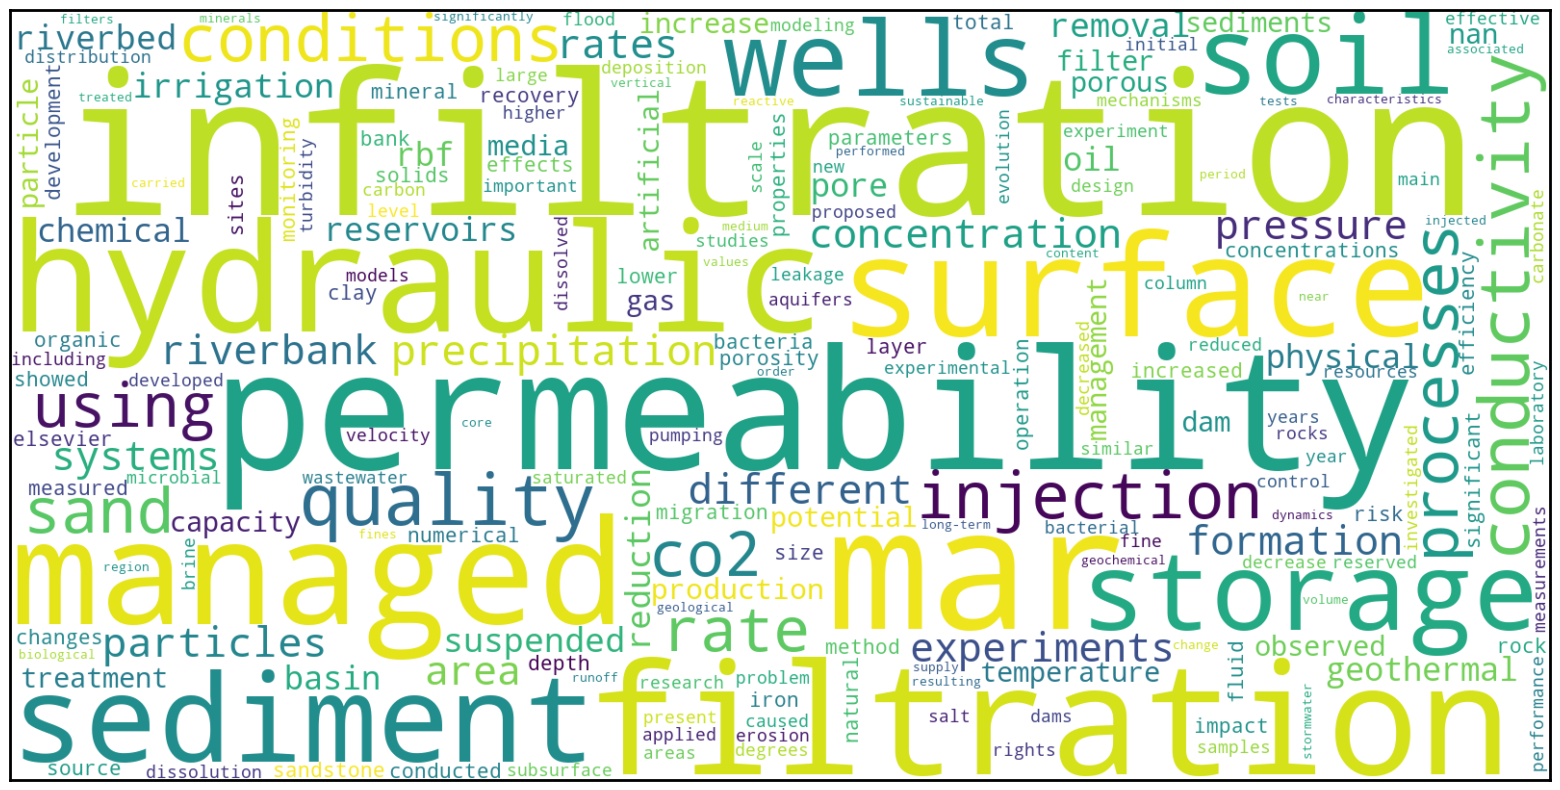

In [3]:
# Load your Excel file
file_path = "C:/Users/mouly/Dropbox/Clogging Paper/Database files/New_Database_2025.xlsx"  # Update with your actual file path
df = pd.read_excel(file_path)

# Combine Keywords and Abstract
combined_text = df[['Author Keywords', 'Keywords Plus', 'Abstract']].astype(str).apply(lambda x: ' '.join(x), axis=1).str.cat(sep=' ').lower()

# Tokenize and remove English stopwords and short generic words
tokens = re.findall(r'\b[a-zA-Z0-9\-\_]+\b', combined_text)
stopwords = set(ENGLISH_STOP_WORDS).union({
    'study', 'model', 'results', 'data', 'system', 'methods', 'approach', 'analysis',
    'effect', 'process', 'use', 'paper', 'based', 'used', 'show', 'provide',
    'value', 'high', 'low', 'time', 'site', 'flow', 'river', 'aquifer', 'bed',
    'stream', 'interaction', 'field', 'groundwater', 'zone', 'recharge', 'transport', 'clogging','reservoir','water'
})
filtered_tokens = [t for t in tokens if t not in stopwords and len(t) > 2]

# Count and generate word cloud
token_counts = Counter(filtered_tokens)
wordcloud1 = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(token_counts)

# Display with boundary
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(wordcloud1, interpolation='bilinear')
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)
plt.box(True)
plt.show()


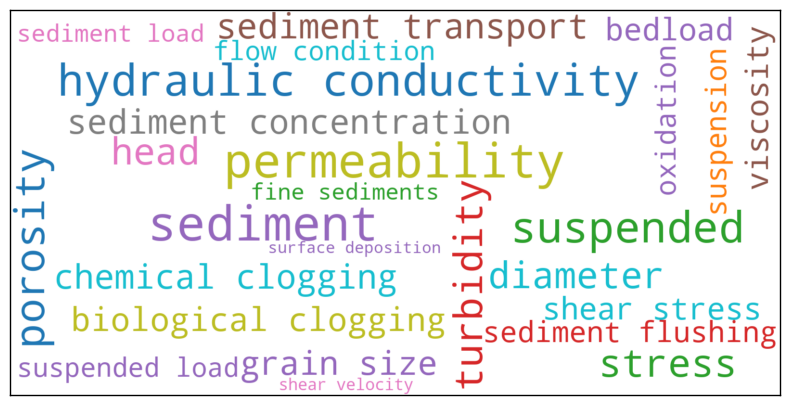

In [4]:
# STEP 2: Extract parameter terms and regenerate cleaned parameter-only word cloud

# Define keyword patterns to match parameters
parameter_keywords = [
    "hydraulic conductivity", "sediment", "porosity", "permeability", "shear stress", "grain size", "sediment deposition", "bedload", "fine sediments",                        "head", "flow condition", "suspended load", "suspension", "sediment diameter", "shear velocity","stress", "turbidity", "oxidation", 
    "biological clogging", "chemical clogging", "surface deposition", "diameter", "streambed surface", "suspended", "head", 
    "viscosity", "sediment transport", "sediment concentration", "sediment flushing", "sediment load"]

# Count occurrences of each parameter in text
param_counts = {term: combined_text.count(term) for term in parameter_keywords if combined_text.count(term) > 0}

# Apply square-root scaling for better visual balance
#scaled_counts = {k: sqrt(v) for k, v in param_counts.items()}
scaled_counts = {k: math.log(v + 1) for k, v in param_counts.items()} 
# Generate and display a word cloud with adjusted scaling
wordcloud = WordCloud( colormap='tab10', width=1600, height=800, background_color='white', prefer_horizontal=.65, 
                      max_font_size=100,random_state=10, collocations=False,relative_scaling=0.5).generate_from_frequencies(scaled_counts)

# Plot Step 2 Parameter Word Cloud
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
plt.box(True)
plt.savefig("C:/Users/mouly/Dropbox/Clogging Paper/Figures/wordcloud.png", dpi=300)
plt.show()


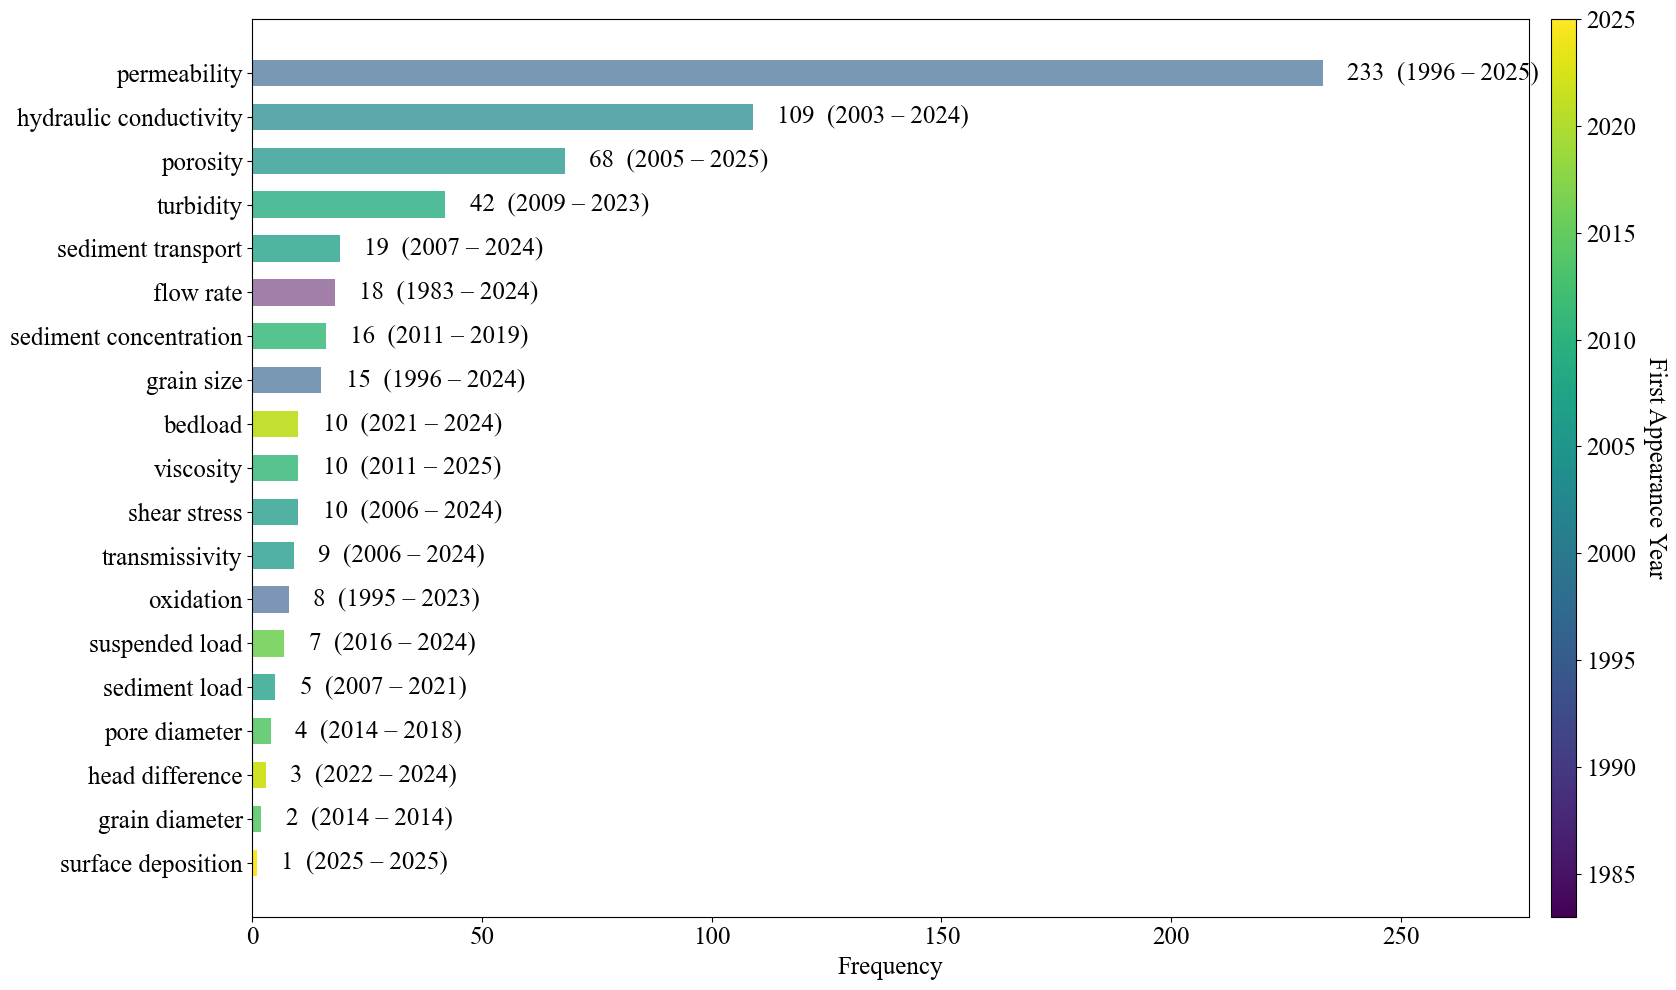

In [5]:
# Load your data
df = pd.read_excel("C:/Users/mouly/Dropbox/Clogging Paper/Database files/New_Database_2025.xlsx")

# Combine keyword text and count frequencies
combined_text = df[['Author Keywords', 'Keywords Plus', 'Abstract']].astype(str).apply(lambda x: ' '.join(x), axis=1).str.cat(sep=' ').lower()

# Define your parameters of interest
parameter_keywords = [
    "hydraulic conductivity", "porosity", "permeability", "shear stress",
    "grain size", "grain diameter", "pore diameter", "bedload", "sediment deposition",
    "sediment transport", "sediment concentration", "sediment load", "suspended load",
    "surface deposition", "head difference", "flow rate", "transmissivity",
    "viscosity", "turbidity", "oxidation",  "streambed surface"]

# Count frequencies
param_counts = {term: combined_text.count(term) for term in parameter_keywords if combined_text.count(term) > 0}

# Prepare year data
df["Publication Year"] = pd.to_numeric(df["Publication Year"], errors='coerce')
df_filtered = df.dropna(subset=["Publication Year"])
df_filtered["Publication Year"] = df_filtered["Publication Year"].astype(int)

# Calculate first and last year of appearance
timeline_stats = []
for param in param_counts:
    first, last = None, None
    for _, row in df_filtered.iterrows():
        year = row["Publication Year"]
        text = f"{row['Author Keywords']} {row['Keywords Plus']} {row['Abstract']}".lower()
        if param in text:
            if first is None or year < first:
                first = year
            if last is None or year > last:
                last = year
    if first is not None:
        timeline_stats.append((param, param_counts[param], first, last))

# Create timeline_df
timeline_df = pd.DataFrame(timeline_stats, columns=["Parameter", "Count", "First Year", "Last Year"])
timeline_df = timeline_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Normalize for color
norm = Normalize(timeline_df["First Year"].min(), timeline_df["First Year"].max())
cmap = cm.viridis
colors = cmap(norm(timeline_df["First Year"]))
alphas = norm(timeline_df["First Year"]) * 0.5 + 0.5

# Plotting
fig, ax = plt.subplots(figsize=(18, 10))
y_pos = np.arange(len(timeline_df))
max_val = timeline_df["Count"].max()
label_offset = max_val * 0.01 + 3

for i in range(len(timeline_df)):
    ax.barh(y_pos[i], timeline_df["Count"].iloc[i],
            height=0.6, color=colors[i], alpha=alphas[i])
    ax.text(timeline_df["Count"].iloc[i] + label_offset, y_pos[i],
            f"{timeline_df['Count'].iloc[i]}  ({timeline_df['First Year'].iloc[i]} – {timeline_df['Last Year'].iloc[i]})",
            va='center', fontsize=18)

# Format axes
ax.set_yticks(y_pos)
ax.set_yticklabels(timeline_df["Parameter"], fontsize=18)
ax.set_xlabel("Frequency", fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.invert_yaxis()

# Colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical',pad=0.014, aspect=35)
cbar.set_label("First Appearance Year", rotation=270, labelpad=22, fontsize=18)
cbar.ax.tick_params(labelsize=18)

# Set right limit to avoid clipping
ax.set_xlim(0, max_val + 45)

plt.tight_layout()
plt.savefig("C:/Users/mouly/Dropbox/Clogging Paper/Figures/parameter_temporal_bar_chart.png", dpi=300)
plt.show()


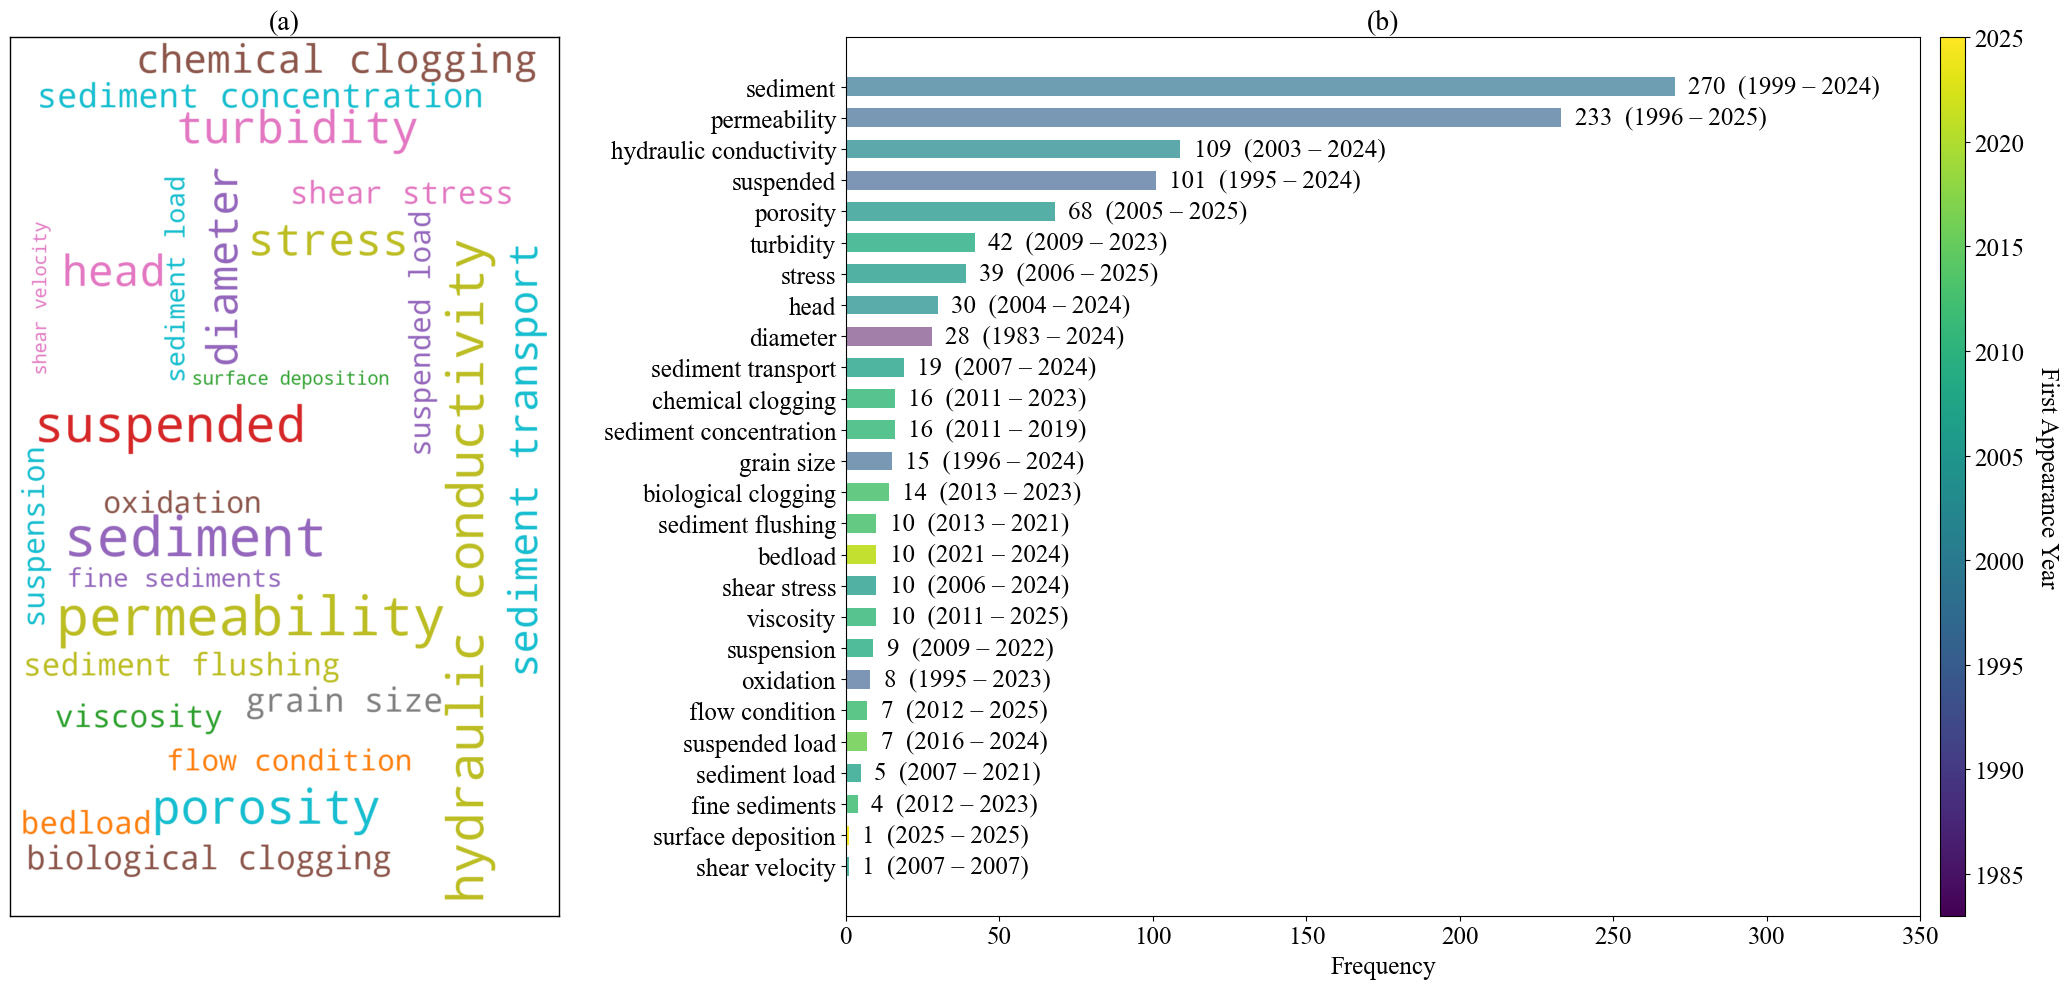

In [7]:
# === STEP 1: Load Excel ===
df = pd.read_excel("C:/Users/mouly/Dropbox/Clogging Paper/Database files/New_Database_2025.xlsx")

# Combine text
combined_text = df[['Author Keywords', 'Keywords Plus', 'Abstract']].astype(str).apply(
    lambda x: ' '.join(x), axis=1).str.cat(sep=' ').lower()

# === STEP 2: Define Parameters of Interest (single list) ===
parameter_keywords = [
    "hydraulic conductivity", "sediment", "porosity", "permeability", "shear stress", "grain size",
    "sediment deposition", "bedload", "fine sediments", "head", "flow condition", "suspended load",
    "suspension", "sediment diameter", "shear velocity", "stress", "turbidity", "oxidation",
    "biological clogging", "chemical clogging", "surface deposition", "diameter", "streambed surface",
    "suspended", "viscosity", "sediment transport", "sediment concentration", "sediment flushing", "sediment load"
]

# === STEP 3: Count Frequencies Once ===
param_counts = {term: combined_text.count(term) for term in parameter_keywords if combined_text.count(term) > 0}

# === STEP 4: Prepare Publication Year for Bar Chart ===
df["Publication Year"] = pd.to_numeric(df["Publication Year"], errors='coerce')
df_filtered = df.dropna(subset=["Publication Year"])
df_filtered["Publication Year"] = df_filtered["Publication Year"].astype(int)

# === STEP 5: Compute First and Last Year for Each Parameter ===
timeline_stats = []
for param in param_counts:
    first, last = None, None
    for _, row in df_filtered.iterrows():
        year = row["Publication Year"]
        text = f"{row['Author Keywords']} {row['Keywords Plus']} {row['Abstract']}".lower()
        if param in text:
            if first is None or year < first:
                first = year
            if last is None or year > last:
                last = year
    if first is not None:
        timeline_stats.append((param, param_counts[param], first, last))

timeline_df = pd.DataFrame(timeline_stats, columns=["Parameter", "Count", "First Year", "Last Year"])
timeline_df = timeline_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

# === STEP 6: Plot Side-by-Side ===
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(22, 10), gridspec_kw={'width_ratios': [1, 2]})

# --- Word Cloud ---
scaled_counts = {k: math.log(v + 1) for k, v in param_counts.items()}
wordcloud = WordCloud(
    colormap='tab10', width=1000, height=1600, background_color='white',
    prefer_horizontal=0.65, max_font_size=100, random_state=10,
    collocations=False, relative_scaling=0.5
).generate_from_frequencies(scaled_counts)

ax1.imshow(wordcloud, interpolation='bilinear')
ax1.set_xticks([])
ax1.set_yticks([])
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
ax1.set_title("(a)", fontsize=20)

# --- Temporal Bar Chart ---
norm = Normalize(timeline_df["First Year"].min(), timeline_df["First Year"].max())
cmap = cm.viridis
colors = cmap(norm(timeline_df["First Year"]))
alphas = norm(timeline_df["First Year"]) * 0.5 + 0.5
y_pos = np.arange(len(timeline_df))
max_val = timeline_df["Count"].max()
label_offset = max_val * 0.005 + 3

for i in range(len(timeline_df)):
    ax2.barh(y_pos[i], timeline_df["Count"].iloc[i], height=0.6, color=colors[i], alpha=alphas[i])
    ax2.text(timeline_df["Count"].iloc[i] + label_offset, y_pos[i],
             f"{timeline_df['Count'].iloc[i]}  ({timeline_df['First Year'].iloc[i]} – {timeline_df['Last Year'].iloc[i]})",
             va='center', fontsize=18)

ax2.set_yticks(y_pos)
ax2.set_yticklabels(timeline_df["Parameter"], fontsize=18)
ax2.set_xlabel("Frequency", fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.invert_yaxis()
ax2.set_title("(b)", fontsize=20)
ax2.set_xlim(0, max_val + 80)

# Colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax2, orientation='vertical', pad=0.015, aspect=35)
cbar.set_label("First Appearance Year", rotation=270, labelpad=25, fontsize=18)
cbar.ax.tick_params(labelsize=18)

# Save and show
plt.tight_layout()
plt.savefig("C:/Users/mouly/Dropbox/Clogging Paper/Figures/parameter_cloud_and_timeline.png", dpi=300)
plt.show()

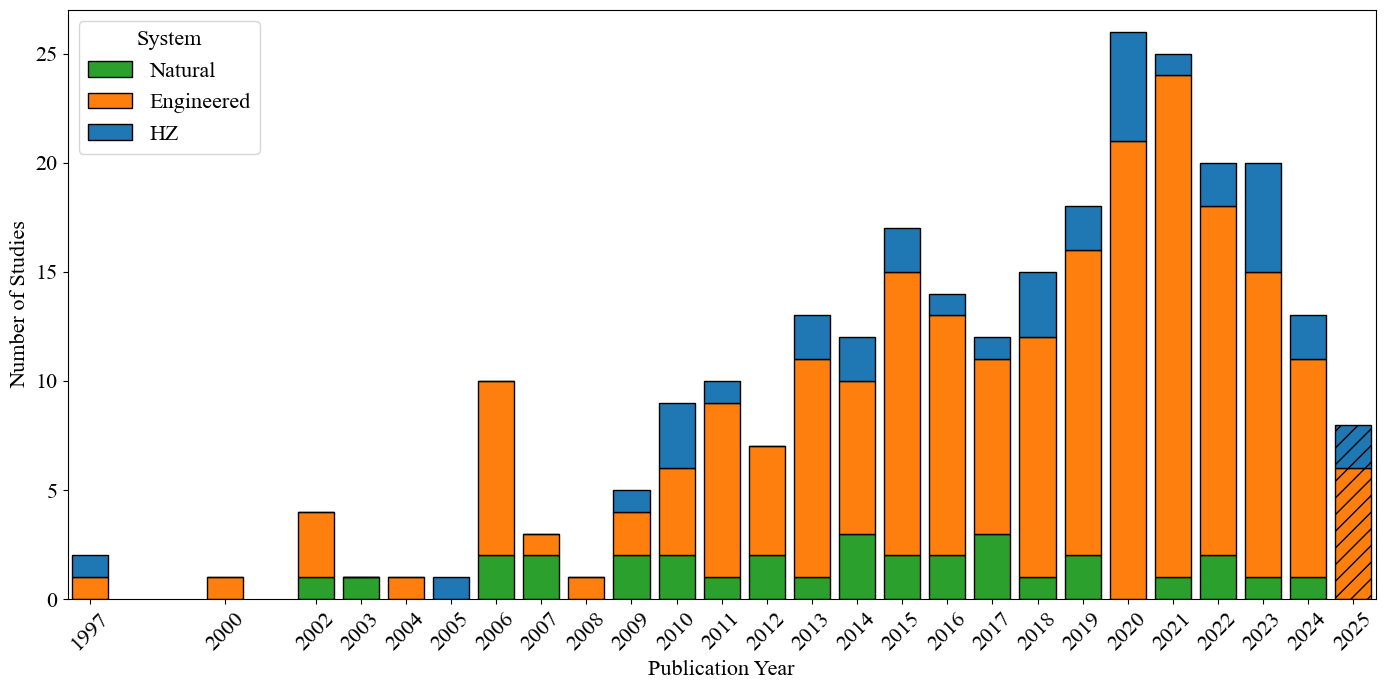

In [10]:
# File path
file_path = r"C:\Users\mouly\Dropbox\Clogging Paper\Database files\Suplementary Database.xlsx"

# Original sheet mapping
sheets = {
    "SA": "SA_2025",
    "RBF": "RBF_2025",
    "MAR": "MAR_2025",
    "HZ": "HZ_2025"
}

# Reclassification into 3 categories
system_map = {
    "SA": "Natural",
    "RBF": "Engineered",
    "MAR": "Engineered",
    "HZ": "HZ"
}

# Build the combined DataFrame
data = []
for label, sheet in sheets.items():
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.columns = df.columns.str.strip()
    if "Publication Year" in df.columns:
        years = df["Publication Year"].dropna().astype(int)
        for year in years:
            data.append({"Year": year, "System": system_map[label]})

df_all = pd.DataFrame(data)
counts = df_all.groupby(["Year", "System"]).size().unstack(fill_value=0).sort_index()
system_labels = ["Natural", "Engineered", "HZ"]

# Custom color palette
colors = {
    "HZ": "#1f77b4",
    "Engineered": "#ff7f0e",
    "Natural": "#2ca02c"
}

fig, ax = plt.subplots(figsize=(14, 7))
bottom = pd.Series(0, index=counts.index)

# Plot bars excluding 2025
for system in system_labels:
    if system not in counts.columns:
        continue
    values = counts[system].copy()
    values_no2025 = values[values.index != 2025]
    ax.bar(values_no2025.index, values_no2025,
           bottom=bottom.loc[values_no2025.index],
           label=system, color=colors[system], edgecolor='black')
    bottom.loc[values_no2025.index] += values_no2025

# Handle 2025 with hatching
if 2025 in counts.index:
    y_offset = 0
    for system in system_labels:
        height = counts.loc[2025, system] if system in counts.columns else 0
        if height > 0:
            ax.bar(2025, height, bottom=y_offset, color=colors[system],
                   edgecolor='black', hatch='//')
            y_offset += height

# Formatting
plt.xlabel("Publication Year", fontsize=16)
plt.ylabel("Number of Studies", fontsize=16)
plt.xticks(ticks=counts.index, labels=counts.index, rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(counts.index.min() - 0.5, counts.index.max() + 0.5)
plt.ylim(0, counts.sum(axis=1).max() + 1)
plt.legend(title="System", fontsize=16, title_fontsize=16, loc='upper left')
plt.tight_layout()

# Save
output_path = r"C:\Users\mouly\Dropbox\Clogging Paper\Figures\clogging_study_timeline_segmented_labeled.png"
plt.savefig(output_path, dpi=300)
plt.show()


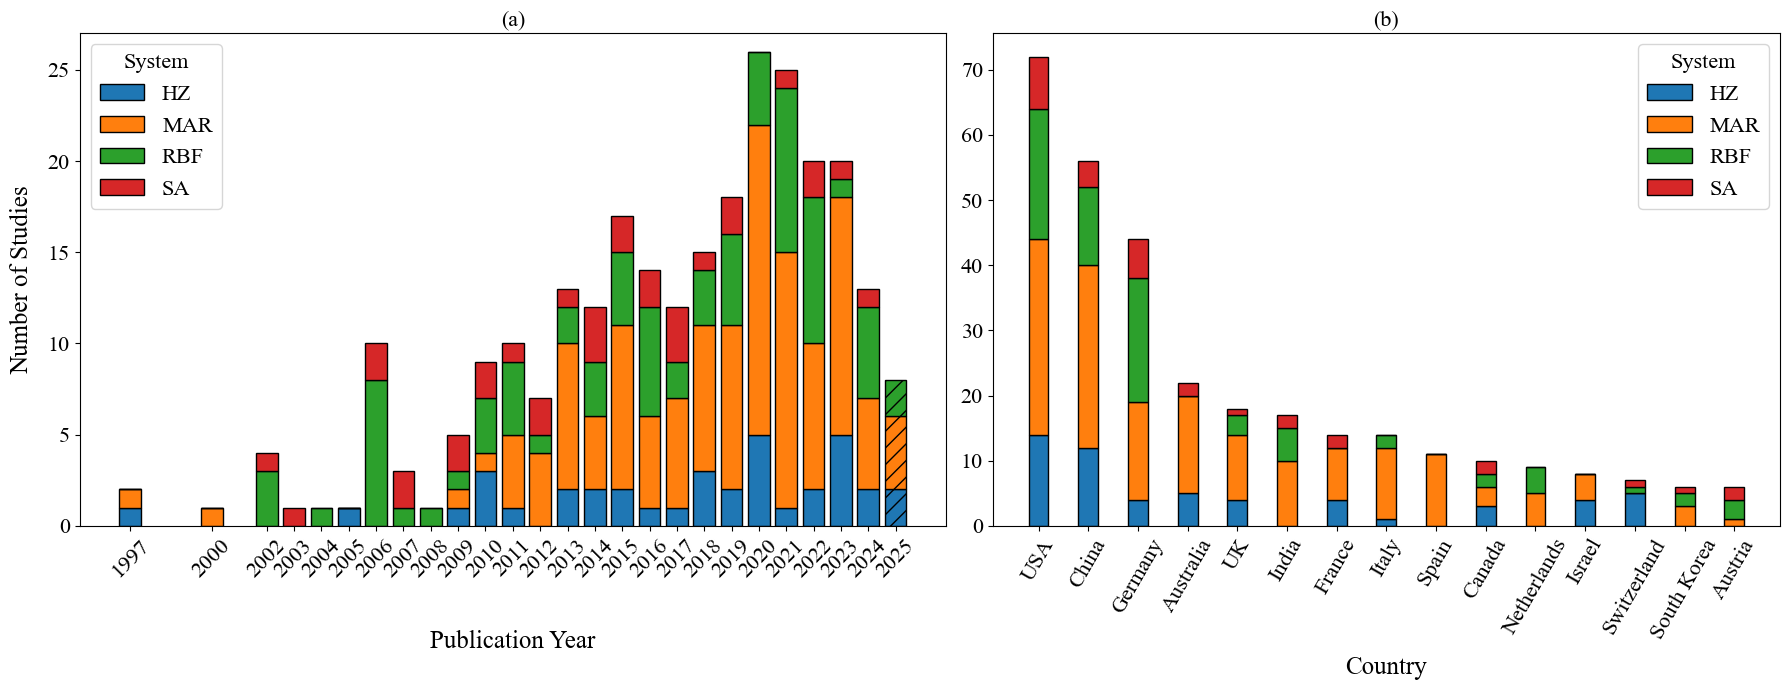

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------ File Path ------------------------
file_path = r"C:\Users\mouly\Dropbox\Clogging Paper\Database files\Supplementry_Database_With_Countries.xlsx"

sheets = {"SA": "SA_2025", "RBF": "RBF_2025", "MAR": "MAR_2025", "HZ": "HZ_2025"}
colors = {
    "HZ": "#1f77b4",
    "MAR": "#ff7f0e",
    "RBF": "#2ca02c",
    "SA": "#d62728"
}
system_order = ["HZ", "MAR", "RBF", "SA"]

# ------------------------ Part 1: Temporal Plot Data ------------------------
temporal_data = []
for label, sheet in sheets.items():
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.columns = df.columns.str.strip()
    if "Publication Year" in df.columns:
        years = df["Publication Year"].dropna().astype(int)
        for year in years:
            temporal_data.append({"Year": year, "System": label})
df_all = pd.DataFrame(temporal_data)
counts = df_all.groupby(["Year", "System"]).size().unstack(fill_value=0).sort_index()

# ------------------------ Part 2: Country Contribution Plot ------------------------
country_records = []
for label, sheet in sheets.items():
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.columns = df.columns.str.strip()
    df["System"] = label
    for _, row in df.iterrows():
        if isinstance(row["Countries"], str):
            for country in row["Countries"].split(";"):
                country = country.strip()
                if country:
                    country_records.append({"Country": country, "System": label})
df_countries = pd.DataFrame(country_records)
country_counts = df_countries.groupby(["Country", "System"]).size().unstack(fill_value=0)
country_counts["Total"] = country_counts.sum(axis=1)
top_countries = country_counts.sort_values("Total", ascending=False).drop(columns="Total").head(15)

# ------------------------ Combined Plot ------------------------
fig, axs = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [1.1, 1]})

# --- Plot (a): Time Series ---
bottom = pd.Series(0, index=counts.index)
for system in system_order:
    if system not in counts.columns:
        continue
    values = counts[system].copy()
    values_no2025 = values[values.index != 2025]
    axs[0].bar(values_no2025.index, values_no2025,
               bottom=bottom.loc[values_no2025.index],
               label=system, color=colors[system], edgecolor='black')
    bottom.loc[values_no2025.index] += values_no2025

# Hatching for 2025
if 2025 in counts.index:
    y_offset = 0
    for system in system_order:
        height = counts.loc[2025, system] if system in counts.columns else 0
        if height > 0:
            axs[0].bar(2025, height, bottom=y_offset, color=colors[system],
                       edgecolor='black', hatch='//')
            y_offset += height

axs[0].set_title("(a)", fontsize=16)
axs[0].set_xticks(counts.index)
axs[0].set_xlabel("Publication Year", fontsize=18, labelpad=35)
axs[0].set_ylabel("Number of Studies", fontsize=18, labelpad=10)
axs[0].set_ylim(0, counts.sum(axis=1).max() + 1)
axs[0].tick_params(axis='x', labelrotation=45, labelsize=16)
axs[0].tick_params(axis='y', labelsize=16)
axs[0].legend(title="System", fontsize=16, title_fontsize=16)

# --- Plot (b): Country Contributions ---
bottom = [0] * len(top_countries)
for system in system_order:
    axs[1].bar(
        top_countries.index,
        top_countries[system],
        bottom=bottom,
        label=system,
        color=colors[system],
        edgecolor='black', width=0.4
    )
    bottom = [i + j for i, j in zip(bottom, top_countries[system])]

axs[1].set_title("(b)", fontsize=16)
axs[1].set_xlabel("Country", fontsize=18, labelpad=10)
#axs[1].set_ylabel("Number of Studies", fontsize=18, labelpad=10)
axs[1].tick_params(axis='x', labelrotation=60, labelsize=16)
axs[1].tick_params(axis='y', labelsize=16)
axs[1].legend(title="System", fontsize=16, title_fontsize=16)

plt.tight_layout()
plt.savefig(r"C:\Users\mouly\Dropbox\Clogging Paper\Figures\combined_temporal_country_plot.png", dpi=300)
plt.show()
